In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
btc_data = pd.read_csv('./btcusdt.csv')
btc_data['Open time'] = pd.to_datetime(btc_data['Open time'], unit='ms')
btc_data.head()


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,LogReturns%
0,2021-01-01 00:00:00,28923.63,29031.34,28690.17,28995.13,2311.811445,1609462799999,6.676883e+07,58389,1215.359238,3.510354e+07,0.246898
1,2021-01-01 01:00:00,28995.13,29470.00,28960.35,29409.99,5403.068471,1609466399999,1.583578e+08,103896,3160.041701,9.261399e+07,1.420653
2,2021-01-01 02:00:00,29410.00,29465.26,29120.03,29194.65,2384.231560,1609469999999,6.984265e+07,57646,1203.433506,3.525275e+07,-0.734928
3,2021-01-01 03:00:00,29195.25,29367.00,29150.02,29278.40,1461.345077,1609473599999,4.276078e+07,42510,775.915666,2.270555e+07,0.284402
4,2021-01-01 04:00:00,29278.41,29395.00,29029.40,29220.31,2038.046803,1609477199999,5.961464e+07,55414,1003.342834,2.934638e+07,-0.198637


35068
31775
Percentage of log_returns in -1 to 1:  0.9060967263602144 %


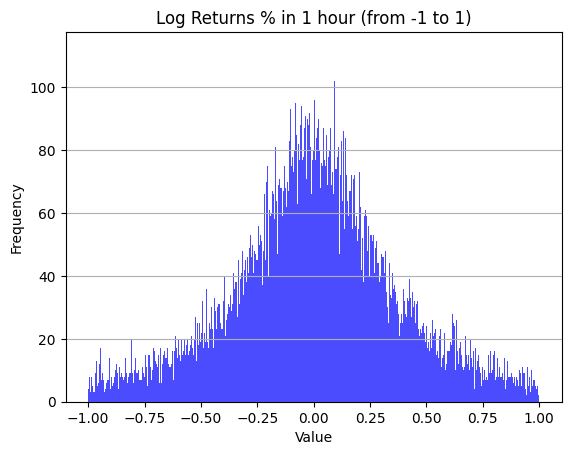

In [4]:
og_log_returns = btc_data['LogReturns%']
len_og = len(og_log_returns)
print(len_og)

log_returns = og_log_returns[(og_log_returns >= -1) & (og_log_returns <= 1)]
len_new = len(log_returns)
print(len_new)
print("Percentage of log_returns in -1 to 1: ",len_new/len_og,'%')
# Plotting the histogram
log_returns.plot(kind='hist', bins=1000, alpha=0.7, color='blue')
plt.title('Log Returns % in 1 hour (from -1 to 1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


35068
34347
Percentage of log_returns in -2 to 2:  0.9794399452492301 %


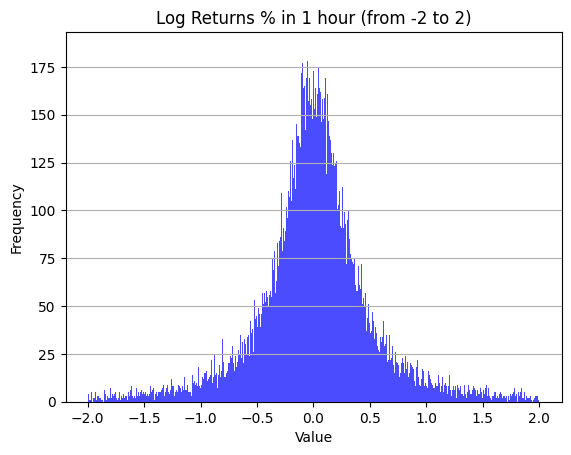

In [5]:
og_log_returns = btc_data['LogReturns%']
len_og = len(og_log_returns)
print(len_og)

log_returns = og_log_returns[(og_log_returns >= -2) & (og_log_returns <= 2)]
len_new = len(log_returns)
print(len_new)
print("Percentage of log_returns in -2 to 2: ",len_new/len_og,'%')

log_returns.plot(kind='hist', bins=1000, alpha=0.7, color='blue')
plt.title('Log Returns % in 1 hour (from -2 to 2)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


35068
34997
Percentage of log_returns in -4 to 4:  0.9979753621535303 %


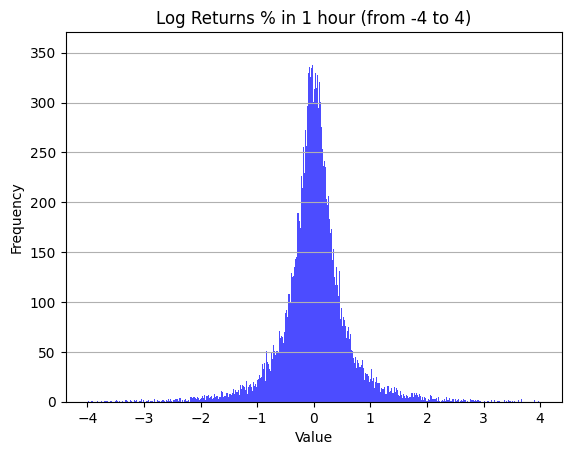

In [6]:
og_log_returns = btc_data['LogReturns%']
len_og = len(og_log_returns)
print(len_og)

log_returns = og_log_returns[(og_log_returns >= -4) & (og_log_returns <= 4)]
len_new = len(log_returns)
print(len_new)
print("Percentage of log_returns in -4 to 4: ",len_new/len_og,'%')

log_returns.plot(kind='hist', bins=1000, alpha=0.7, color='blue')
plt.title('Log Returns % in 1 hour (from -4 to 4)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [7]:
# Sample Series
one_month = 24*30
two_weeks = 24*14
one_week = 24*7

# Calculate the sum of every 2 consecutive entries
result_one_month = log_returns.rolling(window=one_month).sum().dropna()
result_two_weeks = log_returns.rolling(window=two_weeks).sum().dropna()
result_one_week = log_returns.rolling(window=one_week).sum().dropna()

results = [[result_one_month, "one month"], [result_two_weeks, "two weeks"], [result_one_week, "one week"], [log_returns, "one hour"]]

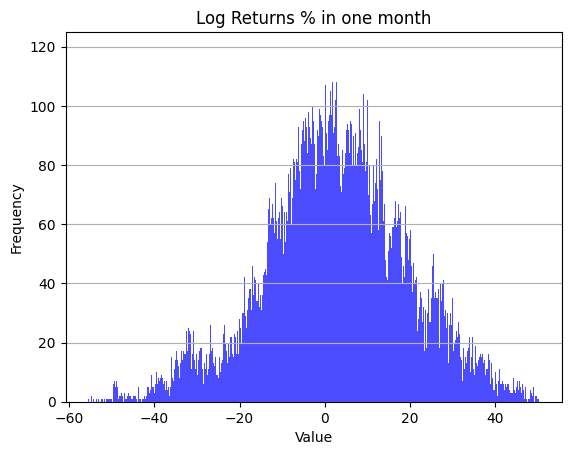

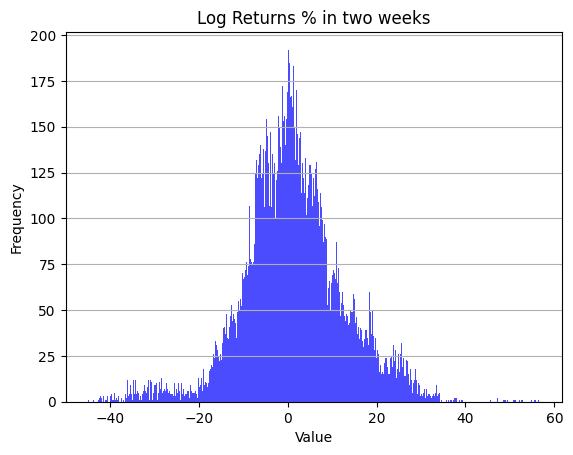

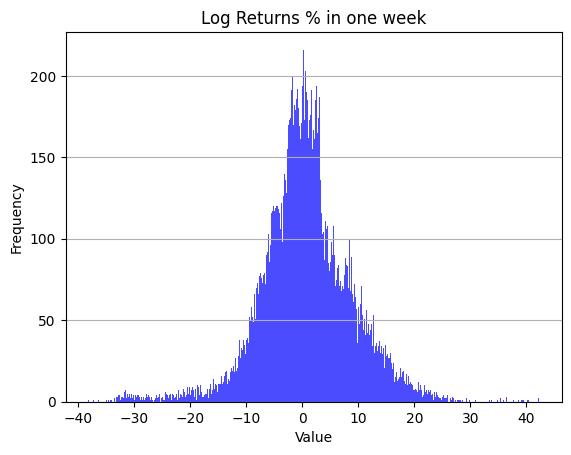

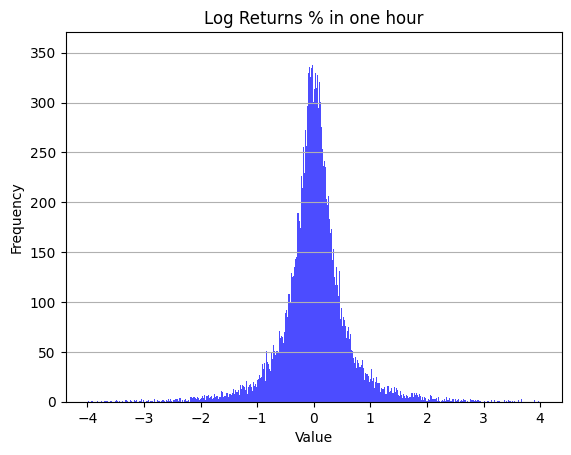

In [8]:
for result, text in results:
    plt.figure()
    result.plot(kind='hist', bins=1000, alpha=0.7, color='blue')
    plt.title(f'Log Returns % in {text}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

In [9]:
for result, text in results:
    positive_returns = (result > 0).sum()
    percentage = (positive_returns/len(result))*100
    print(f"Percentage of positive returns in {text}", percentage)

Percentage of positive returns in one month 57.01616196977653
Percentage of positive returns in two weeks 54.431365760775485
Percentage of positive returns in one week 52.72753373528567
Percentage of positive returns in one hour 50.68720176015087


In [ ]:
# ONE-HIT PROBABILITIES FOR THE PREDICTIONS ABOVE
btc_price_rn = 96100
prediction = 140000


high_prices = btc_data['High']
one_hit_percentage = prediction / btc_price_rn - 1
number_of_hours = 24*19

test = (high_prices[1:1+number_of_hours] < high_prices[0]*(1 + one_hit_percentage)).all()
print(test)

hits = sum((high_prices[i:i+number_of_hours] < high_prices[i]*(1 + one_hit_percentage)).all() for i in range(len(high_prices) - number_of_hours + 1))

percentage = (1 - (hits/(len(high_prices) - number_of_hours + 1)))*100

print(percentage)

True
1.456100309132402
